# Prediction using Random Forest Classifier

Problem Statement :Your client is an Insurance company and they need your help in building a model to predict
whether the policyholder (customer) will pay next premium on time or not.
An insurance policy is an arrangement by which a company undertakes to provide a guarantee of
compensation for specified loss, damage, illness, or death in return for the payment of a specified
premium. A premium is a sum of money that you pay regularly to an insurance company for this
guarantee.
For example, you may pay a premium of Rs. 5000 each year for a medical insurance cover of Rs.
200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance
provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are
wondering how can company bear such high hospitalisation cost when it charges a premium of
only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you,
there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a
few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone
shares the risk of everyone else.
Just like medical insurance, there is life insurance where every year you pay a premium of certain
amount to insurance provider company so that in case of unfortunate event of your death, the
insurance provider company will provide a compensation (called ‘sum assured’) to your
immediate family. Similarly, there can be a variety of insurance products for different kinds of
risks.
As you can imagine, if a large number of customers do not pay the premium on time, it might
disrupt the cash flow and smooth operation for the company. A customer may stop making
regular premium payments for a variety of reasons - some may forget, some may find it expensive
and not worth the value, some may not have money to pay the premium etc.
Building a model to predict whether a customer would make the premium payment can be
extremely helpful for the company because it can then accordingly plan its communication
strategy to reach out to those customers who are less likely to pay and convince them to
continue making timely payment.
Now, in order to predict whether the customer would pay the next premium or not, you have
information about past premium payment history for the policyholders along with their
demographics (age, monthly income, area type) and sourcing channel etc.

In [51]:
#Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [52]:
#Importing data
train=pd.read_csv('train data.csv')
test=pd.read_csv('test data.csv')

# Handling Train Data

In [53]:
train.shape

(79853, 12)

In [54]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [55]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [56]:
#checking null values
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [57]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


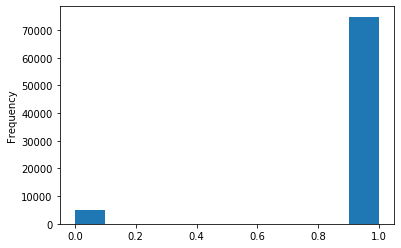

In [58]:
train['target'].plot.hist()

In [59]:
#filling null values
train['Count_3-6_months_late']=train['Count_3-6_months_late'].fillna(train['Count_3-6_months_late'].mean())
train['Count_6-12_months_late ']=train['Count_6-12_months_late'].fillna(train['Count_6-12_months_late'].mean())
train['Count_more_than_12_months_late']=train['Count_more_than_12_months_late'].fillna(train['Count_more_than_12_months_late'].mean())

In [60]:
train.drop('application_underwriting_score',axis=1,inplace=True)

In [61]:
train.shape

(79853, 12)

In [62]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,no_of_premiums_paid,sourcing_channel,residence_area_type,target,Count_6-12_months_late
0,110936,0.429,12058,355060,0.0,0.0,0.0,13,C,Urban,1,0.0
1,41492,0.010,21546,315150,0.0,0.0,0.0,21,A,Urban,1,0.0
2,31300,0.917,17531,84140,2.0,3.0,1.0,7,C,Rural,0,3.0
3,19415,0.049,15341,250510,0.0,0.0,0.0,9,A,Urban,1,0.0
4,99379,0.052,31400,198680,0.0,0.0,0.0,12,B,Urban,1,0.0


In [63]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
Count_6-12_months_late              float64
dtype: object

In [64]:
#Handling categorical features
dummies = pd.get_dummies(train[['sourcing_channel', 'residence_area_type']], drop_first=True)
train = pd.concat([train.drop(['sourcing_channel', 'residence_area_type'],axis=1), dummies],axis=1)

In [65]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,no_of_premiums_paid,target,Count_6-12_months_late,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
0,110936,0.429,12058,355060,0.0,0.0,0.0,13,1,0.0,0,1,0,0,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,21,1,0.0,0,0,0,0,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,7,0,3.0,0,1,0,0,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,9,1,0.0,0,0,0,0,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,12,1,0.0,1,0,0,0,1


# Handling Test Data

In [66]:
test.shape

(34224, 11)

In [67]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [68]:
test.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
dtype: object

In [69]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [70]:
#Checking Null Values
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [71]:
test.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
count,34224.000000,34224.000000,34224.000000,3.422400e+04,34193.000000,34193.000000,34193.000000,32901.000000,34224.000000
mean,56739.956376,0.314457,18824.215346,2.028201e+05,0.238733,0.080718,0.058111,99.061898,10.890428
std,32935.402647,0.334059,5246.525604,2.702536e+05,0.686162,0.454634,0.307046,0.742942,5.216867
min,1.000000,0.000000,7671.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000
25%,28254.750000,0.034000,14972.000000,1.063975e+05,0.000000,0.000000,0.000000,98.800000,7.000000
50%,56488.000000,0.169000,18623.000000,1.650700e+05,0.000000,0.000000,0.000000,99.210000,10.000000
75%,85386.250000,0.540000,22636.000000,2.500200e+05,0.000000,0.000000,0.000000,99.530000,14.000000
max,114077.000000,1.000000,35785.000000,2.191455e+07,12.000000,10.000000,7.000000,99.890000,59.000000


In [72]:
#Fillng null values
test['Count_3-6_months_late']=test['Count_3-6_months_late'].fillna(test['Count_3-6_months_late'].mean())
test['Count_6-12_months_late ']=test['Count_6-12_months_late'].fillna(test['Count_6-12_months_late'].mean())
test['Count_more_than_12_months_late']=test['Count_more_than_12_months_late'].fillna(test['Count_more_than_12_months_late'].mean())

In [73]:
test.drop('application_underwriting_score',axis=1,inplace=True)

In [74]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,no_of_premiums_paid,sourcing_channel,residence_area_type,Count_6-12_months_late
0,649,0.001,27384,51150,0.0,0.0,0.0,7,A,Rural,0.0
1,81136,0.124,23735,285140,0.0,0.0,0.0,19,A,Urban,0.0
2,70762,1.000,17170,186030,0.0,0.0,0.0,2,B,Urban,0.0
3,53935,0.198,16068,123540,0.0,0.0,0.0,11,B,Rural,0.0
4,15476,0.041,10591,200020,1.0,0.0,0.0,14,A,Rural,0.0


In [75]:
test.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
Count_6-12_months_late              float64
dtype: object

In [76]:
#Handling categorical features
dummies = pd.get_dummies(test[['sourcing_channel', 'residence_area_type']], drop_first=True)
test = pd.concat([test.drop(['sourcing_channel', 'residence_area_type'],axis=1), dummies],axis=1)

In [77]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,no_of_premiums_paid,Count_6-12_months_late,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
0,649,0.001,27384,51150,0.0,0.0,0.0,7,0.0,0,0,0,0,0
1,81136,0.124,23735,285140,0.0,0.0,0.0,19,0.0,0,0,0,0,1
2,70762,1.000,17170,186030,0.0,0.0,0.0,2,0.0,1,0,0,0,1
3,53935,0.198,16068,123540,0.0,0.0,0.0,11,0.0,1,0,0,0,0
4,15476,0.041,10591,200020,1.0,0.0,0.0,14,0.0,0,0,0,0,0


In [78]:
test.shape

(34224, 14)

# Spliting the Data

In [79]:
training=train[0:63882]
validation=train[63883:79853]

In [80]:
x_train=training.drop('target',axis=1)
y_train=training['target']
x_val=validation.drop('target',axis=1)
y_val=validation['target']

In [81]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((63882, 14), (63882,), (15970, 14), (15970,))

# Building The Model

In [82]:
Model = RandomForestClassifier()

In [83]:
x_train[:] = np.nan_to_num(x_train)

In [84]:
Model.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
x_val[:] = np.nan_to_num(x_val)

In [86]:
prediction = Model.predict(x_val)

In [87]:
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [88]:
#Checking accuracy
def rmsle(y, y_):
    y = np.exp(y),  
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [89]:
rmsle(y_val,prediction)

0.15298630862150575

In [90]:
Model.score(x_val,y_val)

0.9391358797745774

In [91]:
test[:] = np.nan_to_num(test)

In [92]:
test_prediction = Model.predict(test)

In [93]:
test_prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
submission = pd.DataFrame({'id':test['id'],'target':test_prediction})

In [95]:
submission.head()

,id,target
0,649.0,1
1,81136.0,1
2,70762.0,1
3,53935.0,1
4,15476.0,1


In [96]:
# final submision
filename = 'sample_submission2.csv'
submission.to_csv(filename,index=False)